# HW6 
## Q2

Q2 in-sample error: 0.0285714285714 out-of sample error: 0.084


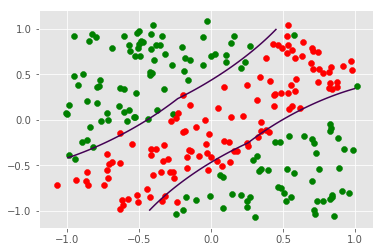

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

def n_l_transform(data_in):
	data_in_trans = data_in.assign(x3 = np.power(data_in['x1'],2))
	data_in_trans = data_in_trans.assign(x4 = np.power(data_in['x2'],2))
	data_in_trans = data_in_trans.assign(x5 = data_in['x1']*data_in['x2'])
	data_in_trans = data_in_trans.assign(x6 = np.absolute(data_in['x1']-data_in['x2']))
	data_in_trans = data_in_trans.assign(x7 = np.absolute(data_in['x1']+data_in['x2']))
	data_in_trans['x0'] = 1
	return data_in_trans
data_in = pd.read_csv('C:\\Users\\Zhesus\\OneDrive\\Learning From Data\HW6\\in.csv')
data_out = pd.read_csv('C:\\Users\\Zhesus\\OneDrive\\Learning From Data\\HW6\out.csv')
data_in_trans = n_l_transform(data_in)
data_out_trans = n_l_transform(data_out)
x_in = data_in_trans.loc[:,data_in_trans.columns!='y']
y_in = data_in_trans.loc[:,'y']
x_out = data_out_trans.loc[:,data_out_trans.columns!='y']
y_out = data_out_trans.loc[:,'y']
def linear_sol(x_in, y_in):
	sudo_inv_x = np.linalg.inv(np.transpose(x_in).dot(x_in)).dot(np.transpose(x_in))
	weight = sudo_inv_x.dot(y_in)
	return weight
def error_est(x_in, y_in, weight):
	y_in_pred = np.sign(x_in.dot(weight))
	return np.mean(y_in != y_in_pred)

weight = linear_sol(x_in,y_in)
err_in = error_est(x_in, y_in, weight)
err_out = error_est(x_out, y_out, weight)
print('Q2', 'in-sample error:', err_in,'out-of sample error:', err_out)
s = plt.figure(1)
plt.scatter(data_out[data_out.y > 0].loc[:,'x1'], data_out[data_out.y>0].loc[:,'x2'], c='green')
plt.scatter(data_out[data_out.y < 0].loc[:,'x1'], data_out[data_out.y<0].loc[:,'x2'], c='red')
x1 = np.linspace(-1,1,100)
x2 = np.linspace(-1,1,100)
X1,X2 = np.meshgrid(x1,x2)
F = weight[0]*X1+weight[1]*X2+weight[2]*X1**2+weight[3]*X2**2+weight[4]*X1*X2+weight[5]*np.absolute(X1-X2)+weight[6]*np.absolute(X1+X2)+weight[7]
plt.contour(X1,X2,F,[0])
plt.show()

## Q3&Q4
Constrained solution is $(X^TX+\lambda I)^{-1}X$

Q3 in-sample reg err: 0.0285714285714 out-of-sample reg err: 0.08


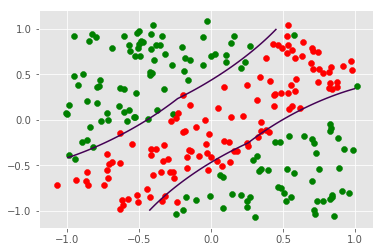

Q4 in-sample reg err: 0.371428571429 out-of-sample reg err: 0.436


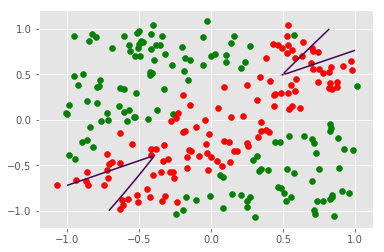

In [7]:
def linear_sol_constrain(x_in, y_in, lamb):
	sudo_inv_x_reg = np.linalg.inv(np.transpose(x_in).dot(x_in) + np.power(10.,lamb) * np.identity(np.shape(x_in)[1])).dot(np.transpose(x_in))
	weight_reg = sudo_inv_x_reg.dot(y_in)
	return weight_reg

lamb = -3
weight_reg = linear_sol_constrain(x_in,y_in,lamb)
err_in_reg = error_est(x_in,y_in,weight_reg)
err_out_reg = error_est(x_out,y_out,weight_reg)
print('Q3', 'in-sample reg err:', err_in_reg, 'out-of-sample reg err:', err_out_reg)
s = plt.figure(1)
plt.scatter(data_out[data_out.y > 0].loc[:,'x1'], data_out[data_out.y>0].loc[:,'x2'], c='green')
plt.scatter(data_out[data_out.y < 0].loc[:,'x1'], data_out[data_out.y<0].loc[:,'x2'], c='red')
F = weight_reg[0]*X1+weight_reg[1]*X2+weight_reg[2]*X1**2+weight_reg[3]*X2**2+weight_reg[4]*X1*X2+weight_reg[5]*np.absolute(X1-X2)+weight_reg[6]*np.absolute(X1+X2)+weight_reg[7]
plt.contour(X1,X2,F,[0])
plt.show()
lamb = 3
weight_reg = linear_sol_constrain(x_in,y_in,lamb)
err_in_reg = error_est(x_in,y_in,weight_reg)
err_out_reg = error_est(x_out,y_out,weight_reg)
print('Q4', 'in-sample reg err:', err_in_reg, 'out-of-sample reg err:', err_out_reg)
s = plt.figure(1)
plt.scatter(data_out[data_out.y > 0].loc[:,'x1'], data_out[data_out.y>0].loc[:,'x2'], c='green')
plt.scatter(data_out[data_out.y < 0].loc[:,'x1'], data_out[data_out.y<0].loc[:,'x2'], c='red')
F = weight_reg[0]*X1+weight_reg[1]*X2+weight_reg[2]*X1**2+weight_reg[3]*X2**2+weight_reg[4]*X1*X2+weight_reg[5]*np.absolute(X1-X2)+weight_reg[6]*np.absolute(X1+X2)+weight_reg[7]
plt.contour(X1,X2,F,[0])
plt.show()


## Q5&Q6

0    0.056
Name: -1, dtype: float64


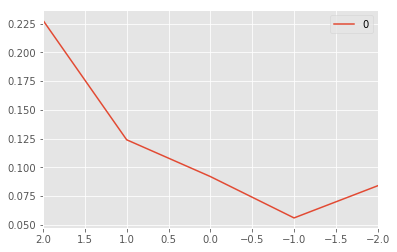

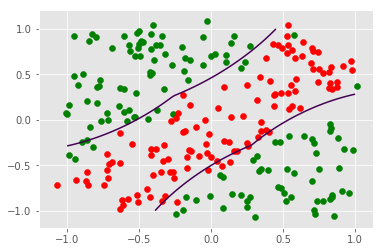

In [10]:
err = []
lamlist = [2,1,0,-1,-2]
for lamb in lamlist:
	weight_reg = linear_sol_constrain(x_in,y_in,lamb)
	err.append(error_est(x_out,y_out,weight_reg))
# plt.plot(lamlist,err)
# plt.show()
err_data = pd.DataFrame(err,index=lamlist)
s = err_data.plot()
print(err_data.loc[-1])
plt.show(s)
weight_reg_opt = linear_sol_constrain(x_in,y_in,-1)
s = plt.figure(1)
plt.scatter(data_out[data_out.y > 0].loc[:,'x1'], data_out[data_out.y>0].loc[:,'x2'], c='green')
plt.scatter(data_out[data_out.y < 0].loc[:,'x1'], data_out[data_out.y<0].loc[:,'x2'], c='red')
F = weight_reg_opt[0]*X1+weight_reg_opt[1]*X2+weight_reg_opt[2]*X1**2+weight_reg_opt[3]*X2**2+weight_reg_opt[4]*X1*X2+weight_reg_opt[5]*np.absolute(X1-X2)+weight_reg_opt[6]*np.absolute(X1+X2)+weight_reg_opt[7]
plt.contour(X1,X2,F,[0])
plt.show()

## Neural Networks

This question gives a hypothetical neural network and asks about how many
of the given operations are performed in a single iteration of backpropagation
(using Stochastic Gradient Descent in one data point).

The network has $L=2$, $d^{(0)}=5$, $d^{(1)}=3$, $d^{(2)}=1$, and only products
of the form $w_{ij}^{(l)}x_i^{(l-1)}$, $w_{ij}^{(l)}\delta_j^{(l)}$, and
$x_i^{(l-1)}\delta_j^{(l)}$ count as operations.

My answer was 47 operations.



From the input layer to the first hidden layer there are 18 operations, and from
the first hidden layer to the output layer there are 4 operations, resulting in
a total of 22 operations.



The computation of delta for the output layer $\delta_j^{(L)}$ do not count as
an operation, since no such products are required. However, the computation of
each delta in the hidden layer does count, resulting in a total of 3 operations.



Finally, we have to update all weights after computing the deltas, resulting
in a total of 22 operations.

